# 📊 YouTube Trending Videos - Exploratory Data Analysis (EDA)

Now that we have a cleaned dataset, we can perform a proper exploratory data analysis (EDA).
In this notebook, we will explore the data, visualize key patterns, and answer relevant questions about YouTube’s trending videos.
We will focus on:

- Views
- Interaction
- Dates and times

**Original dataset :** `USvideos_clean.csv`  
**Author:** Diego Aladrén Mateo

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

# Visual configuration
sns.set(style='whitegrid')

## First look at the dataset

In [30]:


# Relative path to the clean CSV
clean_csv_path = os.path.join("..", "data", "USvideos_clean.csv")
df = pd.read_csv(clean_csv_path)

# First 5 rows
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,publish_hour,like_ratio,comment_ratio,tags_list,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,...,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17,0.076869,0.021318,['SHANtell martin'],People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,False,False,False,"One year after the presidential election, John...",2017-11-13,7,0.040179,0.005252,"['last week tonight trump presidency', '""last ...",Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19,0.045758,0.002563,"['racist superman', '""rudy""', '""mancuso""', '""k...",Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,11,0.029641,0.006253,"['rhett and link', '""gmm""', '""good mythical mo...",Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,False,False,False,I know it's been a while since we did this sho...,2017-11-12,18,0.063097,0.008359,"['ryan', '""higa""', '""higatv""', '""nigahiga""', '...",Entertainment


In [31]:
# Dimensions
print(df.shape)

# Descriptive statistics
df.describe()


(40949, 22)


,category_id,views,likes,dislikes,comment_count,publish_hour,like_ratio,comment_ratio
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,13.766685,0.034413,0.004453
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,6.424996,0.027009,0.005736
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,10.000000,0.014967,0.001607
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,15.000000,0.028273,0.002961
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,18.000000,0.046751,0.005214
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,23.000000,0.290466,0.117643


With this data, we can see that our dataset consists of 40,949 rows, which means we have that number of videos with 22 columns for each one.

In the table below with statistics, we can omit the data for both the ID and the first row, because it is the same in all cases. 
Otherwise, we can see interesting statistics such as that there are approximately 20 times more “Likes” than “Dislikes,” or that the video with the most views has over 200 million. We will go into more detail with all this data later on.

## View Metrics Analysis

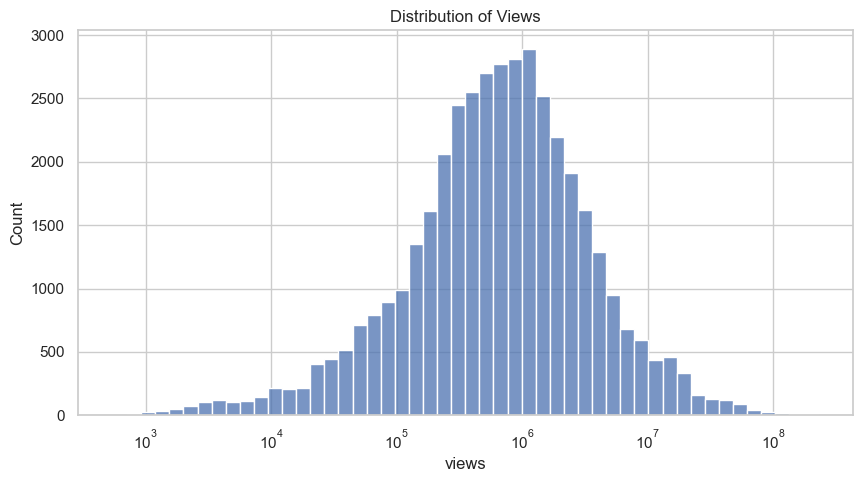

In [32]:
# Histogram of views
plt.figure(figsize=(10,5))
sns.histplot(df['views'], bins=50, log_scale=True)
plt.title("Distribution of Views")
plt.show()


The chart shows the number of videos by view range, as can be seen in the image:

- the x-axis (views) is on a logarithmic scale in order to represent the difference in magnitude between the data points.

- The distribution has a shape similar to a bell curve (normal distribution), but because the X-axis is on a logarithmic scale, this suggests that the actual distribution of views follows a log-normal distribution (or something similar such as a truncated power law or gamma distribution).

- The peak (the mode) of the distribution is around $10^6$ (one million views).

In conclusion, although there are a large number of videos that reach around a million views, only a small percentage of videos become massive viral hits, reaching tens or hundreds of millions of views.

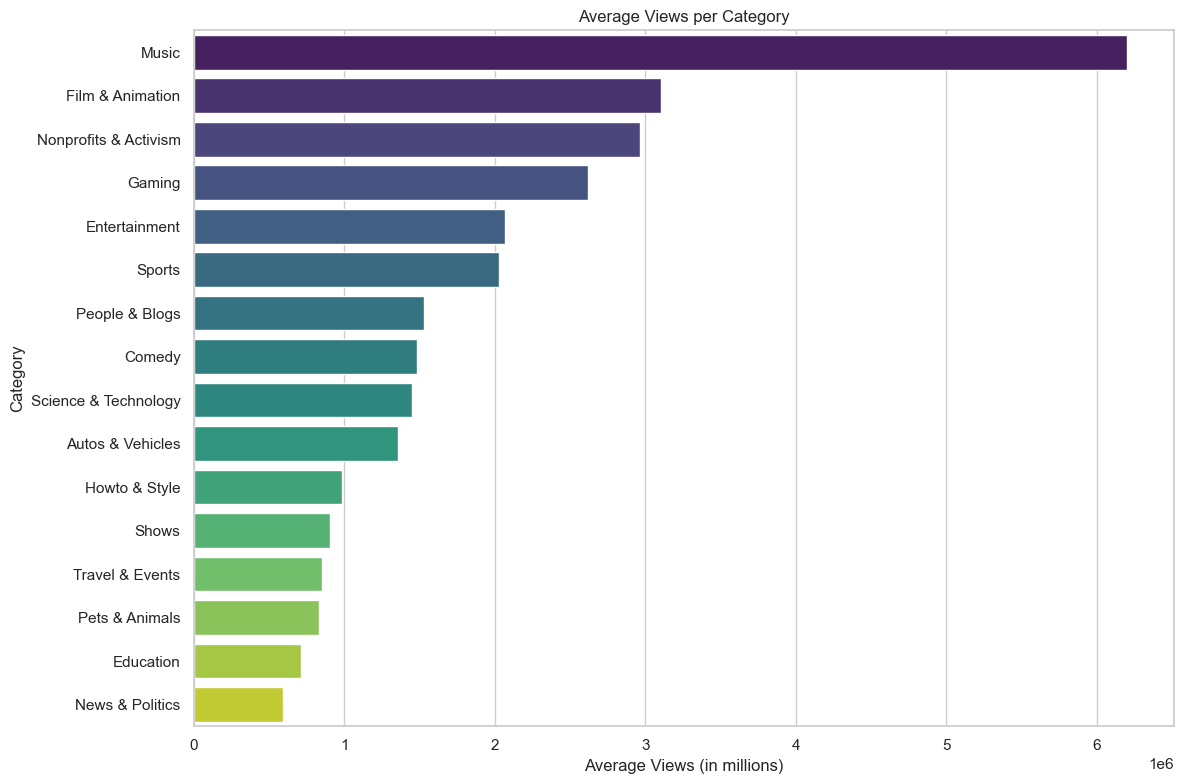

In [38]:
# Calculate the average number of visits per category
views_by_category = (
    df.groupby('category_name')['views']
    .mean()
    .sort_values(ascending=False)
)

# Convert to temporary DataFrame for plotting
plot_df = pd.DataFrame({
    'category': views_by_category.index,
    'avg_views': views_by_category.values
})

# Chart
plt.figure(figsize=(12,8))
sns.barplot(
    x='avg_views',
    y='category',
    data=plot_df,
    palette='viridis',
    hue='category', 
    dodge=False,
    legend=False
)
plt.xlabel("Average Views (in millions)")
plt.ylabel("Category")
plt.title("Average Views per Category")
plt.tight_layout()
plt.show()

This graph is a horizontal bar chart showing the average number of views per video category. The main conclusions are:

- Music dominates by a wide margin: The Music category has by far the highest average number of views, exceeding 6,000,000 views

- High Production Value Content: The Film & Animation category ranks second in terms of average views (close to 3,000,000). This suggests that content associated with entertainment products with high investment or established distribution tends to accumulate views at a higher average rate.

- Mid-Level Groups: Categories such as Nonprofits & Activism and Gaming, along with Entertainment and Sports, form a second group with significantly lower view averages than Music, but still considerably high (between 2,000,000 and 3,000,000).

- The News & Politics and Education categories have the lowest average number of views: both below 1,000,000, which could indicate that these are more niche topics or that the audience is more distributed among other sources.

Now that we have drawn these conclusions, let's look at the same graph but comparing by median to avoid bias from viral videos in any category.

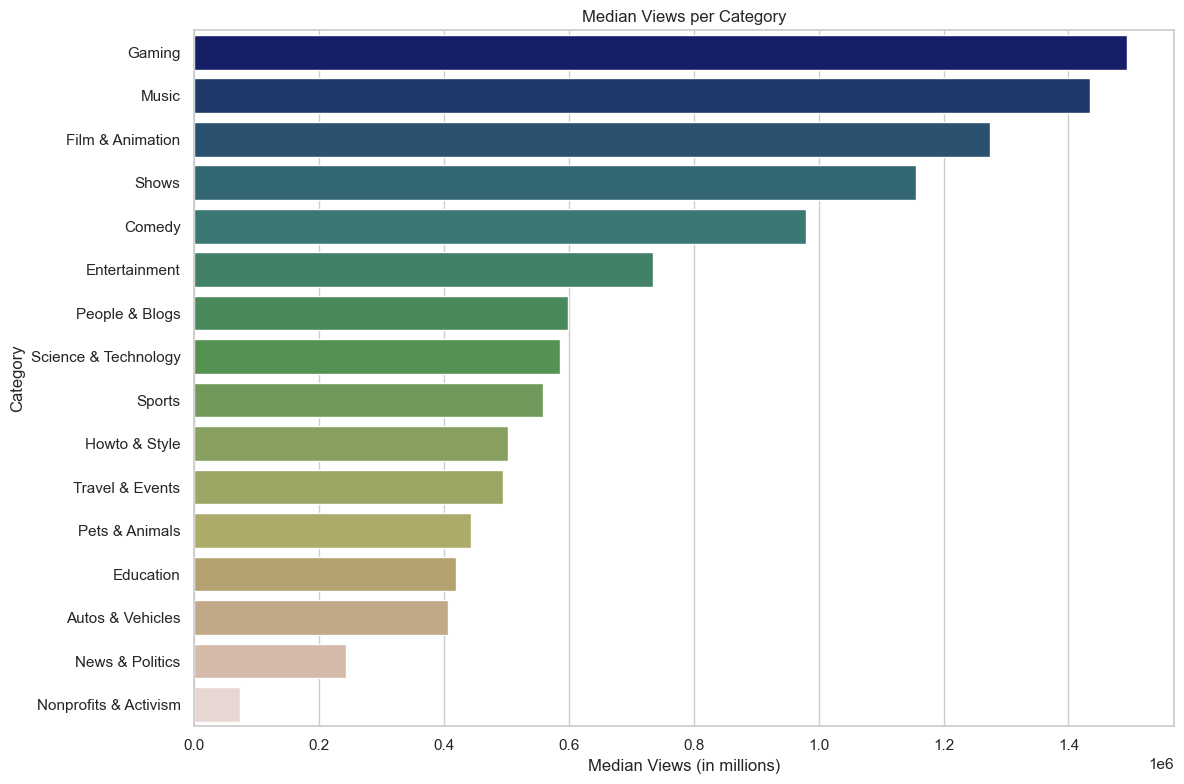

In [58]:
# Calculate the median number of visits per category
views_by_category = (
    df.groupby('category_name')['views']
    .median() 
    .sort_values(ascending=False)
)

# Convert to temporary DataFrame for plotting
plot_df = pd.DataFrame({
    'category': views_by_category.index,
    'median_views': views_by_category.values 
})

# Chart
plt.figure(figsize=(12,8))
sns.barplot(
    x='median_views', 
    y='category',
    data=plot_df,
    palette='gist_earth',
    hue='category', 
    dodge=False,
    legend=False
)
plt.xlabel("Median Views (in millions)") 
plt.ylabel("Category")
plt.title("Median Views per Category") 
plt.tight_layout()
plt.show()

The median reveals that Gaming is the category with the most reliable and highest performance for most of its videos, while the average for categories such as Music is largely due to a few isolated viral hits. The category with the greatest bias is Nonprofits & Activism, which had one of the highest averages but now has the lowest median. The vast majority of videos in this category have very few views, but the few videos that go viral reach millions, which dramatically raises their average.

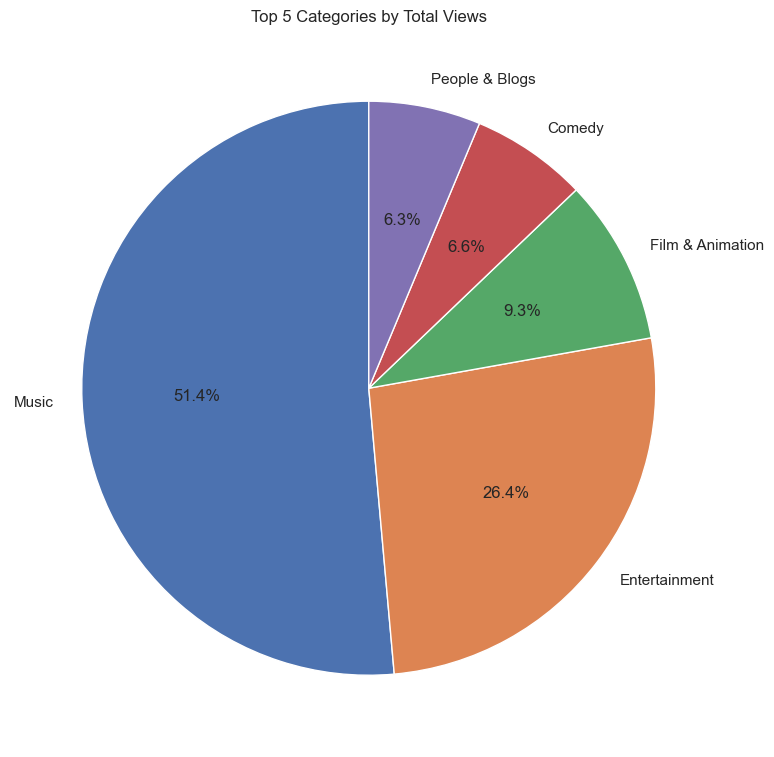

In [34]:

# top 5 total views per category 
views_by_category_sum = (
    df.groupby('category_name', as_index=False)['views']
    .sum()
    .sort_values(by='views', ascending=False)
    .head(5) 
)

# pie grafic
plt.figure(figsize=(8,8))
plt.pie(
    views_by_category_sum['views'], 
    labels=views_by_category_sum['category_name'],
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Top 5 Categories by Total Views')
plt.tight_layout()
plt.show()

The pie chart reveals that total YouTube viewership is extremely concentrated in the Music category, it alone accounts for more than half (51.4%) of all views in the five main categories.
Combined, Music and Entertainment account for almost 80% of total views in the top 5, confirming that high production value content with mass appeal (music, films, programmes, etc.) generates the highest volume of traffic.

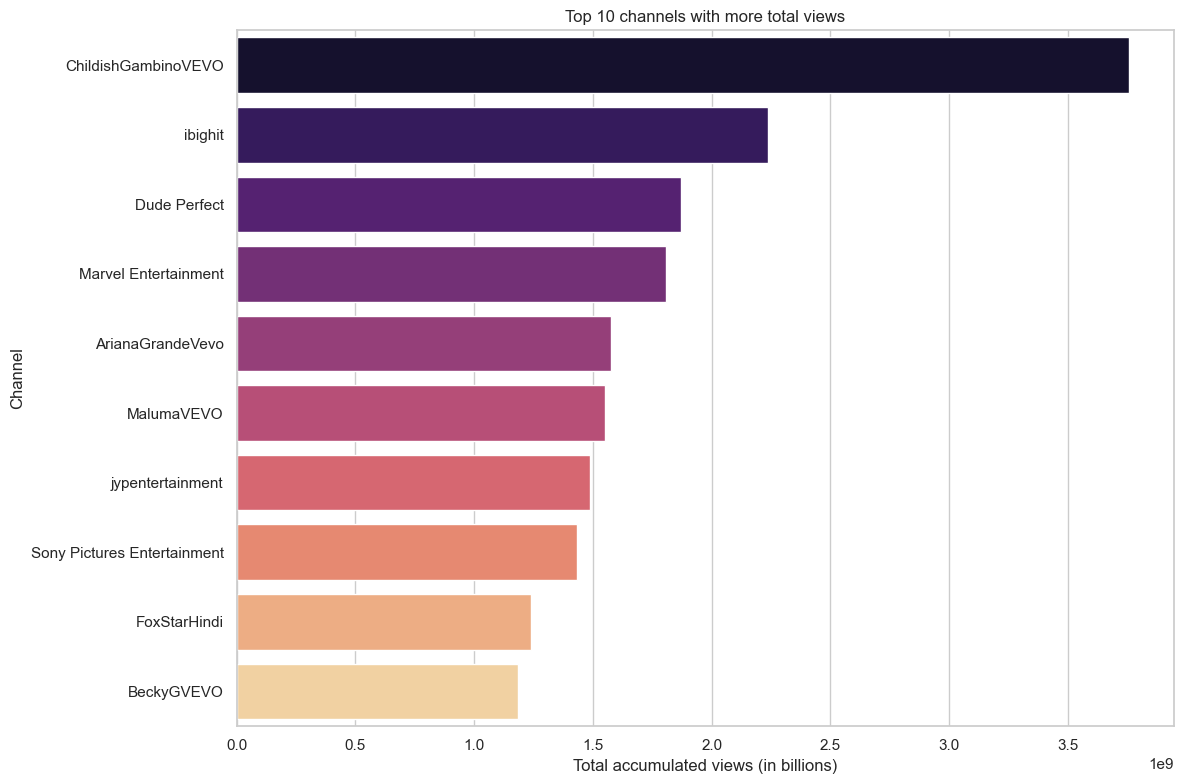

In [43]:
# Total views per channel
top_channels_views = (
    df.groupby('channel_title')['views']
    .sum() 
    .sort_values(ascending=False)
    .head(10) # Top 10
)

# 2. Convert to DataFrame for plotting
plot_df_channels = pd.DataFrame({
    'channel_title': top_channels_views.index,
    'total_views': top_channels_views.values
})

# 3. Plotting
plt.figure(figsize=(12, 8))
sns.barplot(
    x='total_views',
    y='channel_title',
    data=plot_df_channels,
    palette='magma',
    hue='channel_title', 
    dodge=False,
    legend=False
)


plt.xlabel("Total accumulated views (in billions)")
plt.ylabel("Channel")
plt.title("Top 10 channels with more total views")
plt.tight_layout()
plt.show()

And here you can see the top 10 channels with the highest number of accumulated views in the videos of the dataset.

## Interaction Metrics Analysis

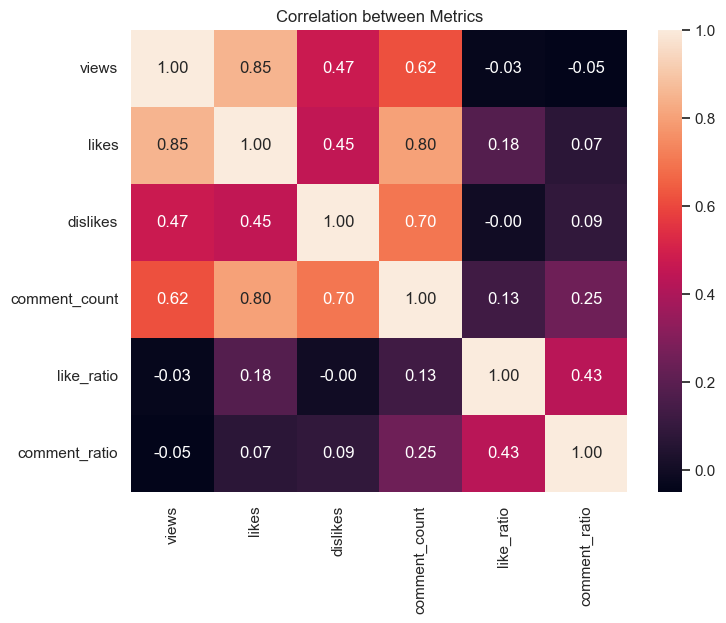

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['views','likes','dislikes','comment_count','like_ratio','comment_ratio']].corr(), annot=True, fmt=".2f")
plt.title("Correlation between Metrics")
plt.show()
